## Implementation of hierarchical clustering with single-linkage

In [69]:
import numpy as np

from matplotlib import pyplot as plt
from collections import OrderedDict

In [130]:
class HierarchicalClustering(object):
    
    def __init__(self, n_clusters=2, max_dist=None):
        """Implementation of agglomerative approach for 
        hierarchical clustering with single-linkage
        
        Args:
            n_clusters (int: default=2) - number of clusters 
                to make (ignored when max_dist is set)
            max_dist (float: default=None) - max allowed 
                distance between clusters
        """
        self.n_clusters = n_clusters
        self.max_dist = max_dist
        self.use_dist = max_dist is not None
        
    def cluster(self, x, print_info=True):
        """Implementation of clustering algorithm. If max_dist
        was set - use early stopping by distance criteria, otherwise
        stop when given number of clusters was reached.
        
        Args:
            x (list[int]) - points to cluster (must belong to one line)
            print_info (bool: default=True) - whether to print merging info 

        Returns:
            list[int] - cluster assignment
        """
        n = len(x)
        assert(n >= 2)

        x2index = dict(zip(x, range(n)))
        x2index_ordered = OrderedDict(sorted(x2index.items(), key=lambda t: t[0]))
        x_sorted = list(x2index_ordered.keys())
        index = list(x2index_ordered.values())

        cur_n_clust = n
        clusters = dict((i, i) for i in range(n))

        if self.use_dist:
            while True:
                clust1, clust2, dist = self.__get_merge_clusters(x_sorted, clusters)
                if dist > self.max_dist:
                    print("Stop merging, max distance was reached!")
                    break
                    
                clusters[clust1] = clusters[clust2]
                del clusters[clust2]
                if print_info:
                    print("Merging:", clust1, clust2)
                    print(clusters)
        else:
            while cur_n_clust != self.n_clusters:
                clust1, clust2, _ = self.__get_merge_clusters(x_sorted, clusters)
                clusters[clust1] = clusters[clust2]
                del clusters[clust2]
                cur_n_clust -= 1
                if print_info:
                    print("Merging:", clust1, clust2)
                    print(clusters)

        result = [_ for _ in range(n)]
        for i, (start, end) in enumerate(clusters.items()):
            for j in range(start, end + 1):
                result[index[j]] = i

        return result
    
    def __get_merge_clusters(self, x_sorted, clusters):
        """Finds clusters which have to be merged via 
        single-linkage strategy"""
        cur_min_dist = x_sorted[-1] - x_sorted[0] + 1
        merge_clust1, merge_clust2 = -1, -1
        for i, (cl_id, cl_end) in enumerate(clusters.items()):
            if i < len(clusters) - 1:
                start_id, end_id = cl_end, cl_end + 1
                cur_dist = x_sorted[end_id] - x_sorted[start_id]
                if cur_dist < cur_min_dist:
                    cur_min_dist = cur_dist
                    merge_clust1, merge_clust2 = cl_id, end_id
        
        return merge_clust1, merge_clust2, cur_min_dist

In [150]:
def plot_points(x, y, labels=None, title=None):
    m_size = 70
    if labels is None:
        plt.scatter(x, y, s=m_size, cmap='tab20', edgecolors='black')
    else:
        plt.scatter(x, y, c=labels, s=m_size, cmap='tab20', edgecolors='black')
    if title is not None:
        plt.title(title)
    plt.show()

In [168]:
n = 10
x = np.random.random(size=(n,))
y = [0] * n
y_noisy = np.random.normal(size=(n,))
print(x)

[0.42669926 0.07242913 0.88892356 0.0414609  0.70684944 0.01062763
 0.0882972  0.75018132 0.41359661 0.19071251]


Merging: 5 6
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 6, 7: 7, 8: 8, 9: 9}
Merging: 2 3
{0: 0, 1: 1, 2: 3, 4: 4, 5: 6, 7: 7, 8: 8, 9: 9}
Merging: 0 1
{0: 1, 2: 3, 4: 4, 5: 6, 7: 7, 8: 8, 9: 9}
Merging: 0 2
{0: 3, 4: 4, 5: 6, 7: 7, 8: 8, 9: 9}
Merging: 7 8
{0: 3, 4: 4, 5: 6, 7: 8, 9: 9}
Merging: 0 4
{0: 4, 5: 6, 7: 8, 9: 9}
Clusters: [1, 0, 3, 0, 2, 0, 0, 2, 1, 0]


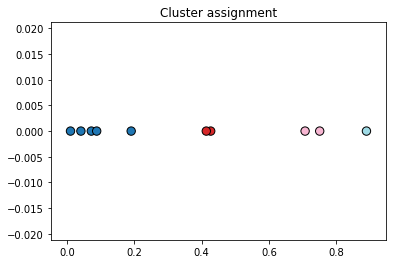

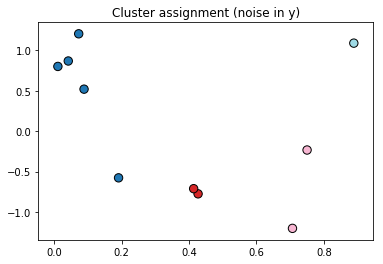

In [169]:
hc = HierarchicalClustering(n_clusters=4)
clusters = hc.cluster(x, print_info=True)
print('Clusters:', clusters)
plot_points(x, y, clusters, title="Cluster assignment")
plot_points(x, y_noisy, clusters, title="Cluster assignment (noise in y)")

Stop merging, max distance was reached!
Clusters: [1, 0, 3, 0, 2, 0, 0, 2, 1, 0]


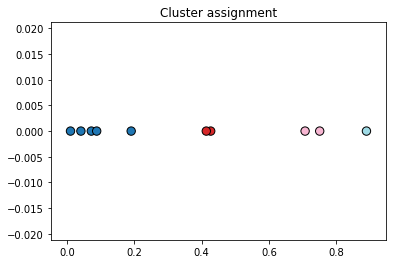

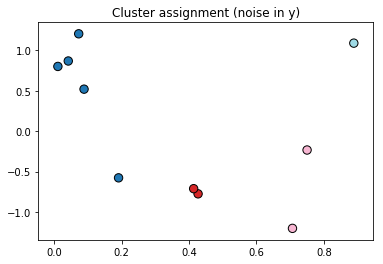

In [172]:
hc = HierarchicalClustering(n_clusters=None, max_dist=0.12)
clusters = hc.cluster(x, print_info=False)
print('Clusters:', clusters)
plot_points(x, y, clusters, title="Cluster assignment")
plot_points(x, y_noisy, clusters, title="Cluster assignment (noise in y)")

## "Bag clustering" example (Chaining)

In [184]:
n = 10
x = [0.1, 0.12, 0.17, 0.25, 0.27, 0.35, 0.4, 0.45, 0.57, 0.59]
y = [0] * n
print(x)

[0.1, 0.12, 0.17, 0.25, 0.27, 0.35, 0.4, 0.45, 0.57, 0.59]


Stop merging, max distance was reached!
Clusters: [0, 0, 0, 0, 0, 0, 0, 0, 1, 1]


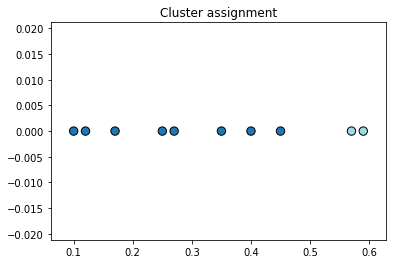

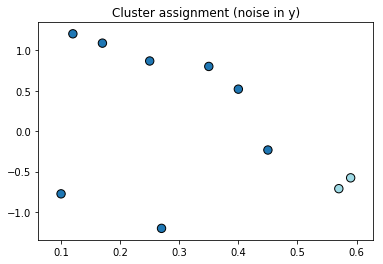

In [185]:
hc = HierarchicalClustering(n_clusters=None, max_dist=0.1)
clusters = hc.cluster(x, print_info=False)
print('Clusters:', clusters)
plot_points(x, y, clusters, title="Cluster assignment")
plot_points(x, y_noisy, clusters, title="Cluster assignment (noise in y)")